<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/04_Clustering_in_Real_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Clustering in Real World</h1> 
</strong>

---


In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 480, done.
remote: Counting objects: 100% (480/480), done.
remote: Compressing objects: 100% (418/418), done.
remote: Total 2666 (delta 182), reused 308 (delta 56), pack-reused 2186
Receiving objects: 100% (2666/2666), 334.34 MiB | 33.49 MiB/s, done.
Resolving deltas: 100% (960/960), done.
Checking out files: 100% (1093/1093), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#plt.style.use('ggplot')
sns.set_theme()
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/30_Cluster-Analysis-in-Python/_dataSet')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/30_Cluster-Analysis-in-Python/_dataSet


In [4]:
ls

batman.jpg     fifa_18_dataset.csv      mouse.csv        pokemon.csv
comic_con.csv  fifa_18_sample_data.csv  movies_plot.csv  uniform_data.csv


## Dominant colors in images
- Dominant colors in images
    - All images consist of pixels
    - Each pixel has **three** values: **R, G, B**
    - **Pixel Color**: combination of these RGB values or the actual color of the pixal.
    - Perform **k-means** on **standardized RGB values** to find **cluster centers**
    - Application: Identifying features in statelite images

    ![kmean_sat](https://miro.medium.com/max/2042/1*IiZ0HWpGS9lwJ13Yb92X-g.png)

    In this satellite image, you can see the terrain of a river valley. Various colors typically belong to different features. K-means clustering can be used to cluster them into groups, which can then be identified into various surface features like water and vegetation.

### __Tools to find dominant colors__

- __Convert image to pixels:__ `matplotlib.image.imread`
    - this method converts a JPEG image into a matrix, which contains the RGB values of each pixel.

- __Display colors of cluster centers:__`matplotlib.pyplot.imshow`
    - The second method is the imshow method which would display colors of the cluster centers once you perform k-means clustering on the RGB values.



### Extract RGB values from image
There are broadly three steps to find the dominant colors in an image:

- Extract RGB values into three lists.
- Perform k-means clustering on scaled RGB values.
- Display the colors of cluster centers.

![batman](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/30_Cluster-Analysis-in-Python/_dataSet/batman.jpg?raw=true)

In [5]:
import matplotlib.image as img

r = []
g = []
b = []

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g, and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row: 
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


### How many dominant colors?
Construct an elbow plot with the data frame. How many dominant colors are present?

- Preprocess

In [6]:
from scipy.cluster.vq import whiten

batman_df = pd.DataFrame({'red':r, 'blue':b, 'green':g})
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

In [7]:
batman_df.head(3)

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,36,25,28,0.450157,0.279912,0.370103
1,39,19,21,0.487671,0.212733,0.277577
2,52,21,20,0.650227,0.235126,0.264359


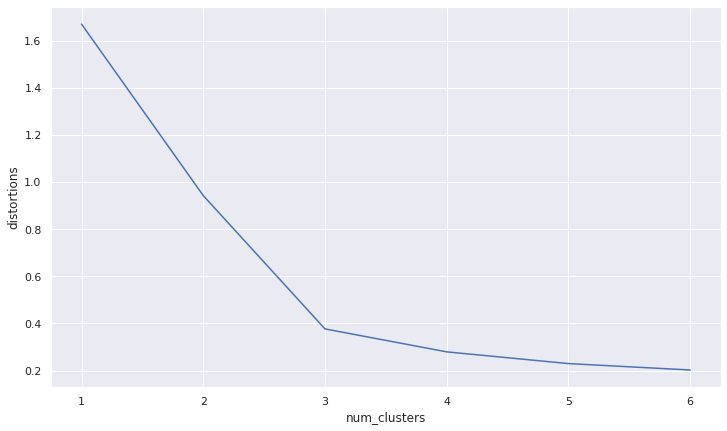

In [8]:
from scipy.cluster.vq import kmeans

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Plot Size
plt.figure(figsize=(12, 7))
# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

Notice that there are three distinct colors present in the image, which is supported by the elbow plot.

### Display dominant colors
To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: 
```python
converted_pixel = standardized_pixel * pixel_std / 255
```

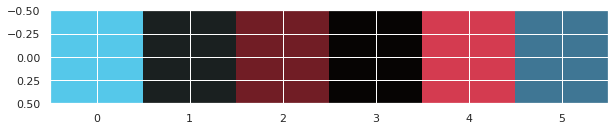

In [9]:
colors = []

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255.0,
        scaled_g * g_std / 255.0,
        scaled_b * b_std / 255.0
        )
    )
# Plot Size
plt.figure(figsize=(10,6))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

## Document clustering

- **Document clustering: concepts**
    - 1. Clean data before processing
    - 2. Determine the importance of the terms in a document (in tf-idf matrix)
    - 3. Cluster the tf-idf matrix
    - 4. Find top terms, documents in each cluster

- **Clean and tokenize data**
    - Convert text into smaller parts called tokens, clean data for processing.

    The text in itself **cannot** be analyzed before converting into smaller parts called __tokens__, which we achieve by using **NLTK's word_tokenize method**.
        - First, we remove all special characters from tokens and check if it contains to any stop words.
        - Finally, we return the cleaned tokens. Here's the output of sample quote from the movie Pink Panther.

    ```python
from nltk.tokenize import word_tokenize
import re
def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens
remove_noise("It is lovely weather we are having. I hope the weather continues.")
    ```

- **Document term matrix and sparse matrices**

    - Once relevant terms have been extracted, a matrix is formed, with the terms and documents as dimensions.
    - An element of the matrix signifies how many times a term has occurred in each document. 
    > Most elements are zeros, hence, __sparse matrices__ are used to store these matrices more efficiently. A sparse matrix only contains terms which have non zero elements.

![sparse_mat](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/30_Cluster-Analysis-in-Python/_img/sparse_mat.png?raw=true)

- __TF-IDF (Term Frequency - Inverse Document Frequency)__
    - A weighted measure: evaluate how important a word is to a document in a collection.
    
    ```python
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8,
                                   max_features=50,
                                   min_df=0.2,
                                   tokenizer=remove_noise)
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
    ```

    To find the TF-IDF of terms in a group of documents, we use the `TfidfVectorizer` class of sklearn. We initialize it with the following features: `max_df` and `min_df` signify the maximum and minimum fraction of documents a word should occur in - here we go ahead with terms that appear in more than __20%__ but less than __80%__ documents. __We keep the top 50 terms__. Finally, we use our custom function as a tokenizer. The `fit_transform` method creates the __TF-IDF matrix__ for the data, which is a __sparse matrix__.



__NOTE:__

`k-means` in scipy **does not work with sparse matrices**, so we **convert** the __TF-IDF__ matrix to its expanded form using the `.todense()` method.

`k-means` can then be applied to get the cluster centers. We do not use the elbow plot, as it will take an erratic form due to the high number of variables.

```python
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)
```
__Top terms per cluster__

- **Cluster centers**: lists with a size equal to the number of terms
- Each value in the cluster center is its importance

    ```python
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

    # OUTPUT
    # ['room', 'hotel', 'staff']
    # ['bad', 'location', 'breakfast']
    ```
__More considerations__

- we have seen a simple form of document clustering. There are more considerations when it comes to __NLP__. For instance, you can modify the `remove_noise` method to filter `hyperlinks`, or replace emoticons with text.

- We can __normalize__ every word to its base form: for instance, run, ran and running are the forms of the same verb run.

- Further, the `.todense()` method __may not work with large datasets__, and we may need to consider an implementation of __k-means__ that works with __sparse matrices__.


### TF-IDF of movie plots
Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

Use the ```TfidfVectorizer``` class to perform the TF-IDF of movie plots stored in the list ```plots```. The ```remove_noise()``` function is available to use as a ```tokenizer``` in the ```TfidfVectorizer``` class. The ```.fit_transform()``` method fits the data into the ```TfidfVectorizer``` objects and then generates the TF-IDF sparse matrix.

**Note: It takes a few seconds to run the ```.fit_transform()``` method.**

In [10]:
movie = pd.read_csv('movies_plot.csv')
movie.head()

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...


In [11]:
plots = movie['Plot'].values

In [12]:
from nltk.tokenize import word_tokenize
import re

import nltk
nltk.download('punkt')

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###__Creating the sparse matrix__

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.1,
                                   max_df=0.75,
                                   max_features=50,
                                   tokenizer=remove_noise)

# Use the .fit_transform() on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

### Top terms in movie clusters
Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the ```.todense()``` method to convert the sparse matrix, ```tfidf_matrix``` to a normal matrix for the ```kmeans()``` function to process. Then, use the ```.get_feature_names()``` method to get a list of terms in the ```tfidf_vectorizer``` object. The zip() function in Python joins two lists.

With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.



In [14]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['him', 'they', 'who']
['her', 'she', 'him']


## Clustering with multiple features


### **Basic checks**

While it is important to understand that all features can not be visualized and assessed at the same time when clustering with more than 3 features, we will discuss a few techniques to validate your results. This step assumes that you have created the elbow plot, performed the clustering process and generated cluster labels. First, you can check how the cluster centers vary with respect to the overall data. If you notice that cluster centers of some features do not vary significantly with respect to the overall data, perhaps, it is an indication that you can drop that feature in the next run. Next, you can also look at the sizes of the clusters formed. If one or more clusters are significantly smaller than the rest, you may want to double if their cluster centers are similar to other clusters. If the answer is yes, you may want to reduce the number of clusters in subsequent runs. In this case, you notice that the second cluster is significantly smaller. It is because we have performed clustering on three attacking attributes, for which goalkeepers have a very low value as indicated by the cluster centers. Hence, the smaller cluster is composed primarily of goalkeepers, as we will explore later.

**Visualizations**

Even though all variables cannot be visualized across clusters, there are other simpler visualizations that help you understand the results of clustering. You may either visualize cluster centers or other variables stacked against each other. In pandas, you can use the plot method after groupby to generate such plots. In this example, the bar chart is demonstrated. You can also create a line chart to see how variables vary across clusters. In our case, you will notice that all three attributes are significantly higher in one cluster.

**Feature reduction**

When dealing with a large number of features, certain techniques of feature reduction may be used. Two popular tools to reduce the number of features are:

- **Factor analysis** and
- **Multidimensional Scaling**

we consider them as a precursor to clustering.

### Basic checks on clusters
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (```pac```), Dribbling (```dri```) and Shooting (```sho```) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.



In [27]:
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa.head(2)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,...,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,...,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
fifa.describe()

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,9.390000e+02,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000,1000.000000,1000.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,113.000000
mean,185173.438000,1885.120000,27.330000,182.229000,77.169000,1.788405e+07,69432.000000,3.476102e+07,80.404000,82.365000,73.627000,67.532000,71.408000,75.690000,58.365000,73.247000,2.273000,2.723000,3.241000,61.452000,57.15900,60.882000,71.554000,56.158000,67.300000,61.122000,55.531000,65.855000,71.361000,69.744000,70.107000,69.937000,77.784000,66.434000,68.650000,70.326000,71.234000,71.427000,61.032000,65.76500,56.941000,61.738000,67.440000,58.878000,73.727000,50.550000,55.690000,52.627000,18.343000,18.143000,17.446,18.056000,18.454000,70.618940,71.985344,72.220970,72.617813,72.166855,72.622322,68.466742,65.036077,67.153326,68.455468,70.618940,71.985344,72.220970,72.617813,72.166855,72.622322,68.466742,65.036077,67.153326,68.455468,70.618940,72.220970,72.617813,72.166855,68.466742,65.036077,80.752212
std,35067.704145,266.410323,3.654375,6.939504,7.452515,1.369776e+07,62034.277844,2.705161e+07,2.917412,3.663222,11.628547,13.704042,8.829241,9.443892,20.019004,8.538436,0.780436,0.998633,0.750655,21.381882,22.73197,20.834927,15.689016,21.755283,21.570983,21.952244,21.267754,15.553066,18.892528,14.547168,13.963615,14.211932,4.678165,15.299795,18.599232,11.451588,15.584997,11.702291,21.786731,17.97935,23.852767,23.382859,14.415138,18.373369,10.056023,26.261019,25.936936,26.335707,22.476355,21.792096,20.264,22.168408,23.190465,8.085966,9.525113,9.119144,8.910354,6.503281,8.449590,9.731889,13.669133,9.664762,8.157728,8.085966,9.525113,9.119144,8.910354,6.503281,8.449590,9.731889,13.669133,9.664762,8.157728,8.085966,9.119144,8.910354,6.503281,9.731889,13.669133,3.129728
min,41.000000,1081.000000,18.000000,163.000000,58.000000,0.000000e+00,0.000000,1.400000e+06,77.000000,77.000000,27.000000,19.000000,36.000000,40.000000,17.000000,43.000000,1.000000,1.000000,1.000000,9.000000,6.00000,10.000000,15.000000,7.000000,9.000000,9.000000,8.000000,12.000000,10.000000,26.000000,28.000000,26.000000,61.000000,22.000000,12.000000,30.000000,18.000000,31.000000,7.000000,11.00000,10.000000,3.000000,15.000000,10.000000,20.000000,5.000000,9.000000,8.000000,1.000000,1.000000,1.000,1.000000,1.000000,46.000000,42.000000,44.000000,42.000000,46.000000,45.000000,46.000000,34.000000,43.000000,46.000000,46.000000,42.000000,44.000000,42.000000,46.000000,45.000000,46.000000,34.000000,43.000000,46.000000,46.000000,44.000000,42.000000,46.000000,46.000000,34.000000,77.000000
25%,177120.000000,1836.500000,25.000000,178.000000

In [31]:
from scipy.cluster.vq import whiten

fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])

In [32]:
from scipy.cluster.vq import vq

cluster_centers, _ = kmeans(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], 3)

fifa['cluster_labels'], _ = vq(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], cluster_centers)

In [33]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    182
1    463
2    355
Name: ID, dtype: int64
cluster_labels
0    63225.274725
1    76738.660907
2    63084.507042
Name: eur_wage, dtype: float64


- The cluster sizes are not very different, and
- There are no significant differences that can be seen in the wages.
- Further analysis is required to validate these clusters.

### FIFA 18: what makes a complete player?
The overall level of a player in FIFA 18 is defined by six characteristics: pace (```pac```), shooting (```sho```), passing (```pas```), dribbling (```dri```), defending (```def```), physical (```phy```).

![playercard](https://media.contentapi.ea.com/content/dam/ea/easports/fifa/features/2017/top100-ratings/10-1/fut18-top100-hazard-lg.jpg)

In [34]:
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

In [35]:
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pac', 'scaled_dri', 'scaled_def', 'scaled_phy']

In [38]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['T. Kroos' 'Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng']


![fifa_clust](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/30_Cluster-Analysis-in-Python/_img/fifa_clust.png?raw=true)

The data was sorted before you performed the clustering. Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>